<a href="https://colab.research.google.com/github/Tanveer-heir/Adult_Income/blob/main/Make_Moon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [ ]:
# Generate linearly separable data
X, y = make_blobs(
    n_samples=100,
    centers=2,
    cluster_std=1.0,
    random_state=42
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
svm_hard = SVC(kernel="linear", C=1e6)
svm_soft = SVC(kernel="linear", C=0.1)

svm_hard.fit(X_scaled, y)
svm_soft.fit(X_scaled, y)


SVC(C=0.1, kernel='linear')

In [ ]:
def plot_svm(model, X, y, title):
    plt.figure(figsize=(6, 5))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(
        XX, YY, Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.7,
        linestyles=["--", "-", "--"]
    )

    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        facecolors="none",
        edgecolors="k"
    )

    plt.title(title)
    plt.show()


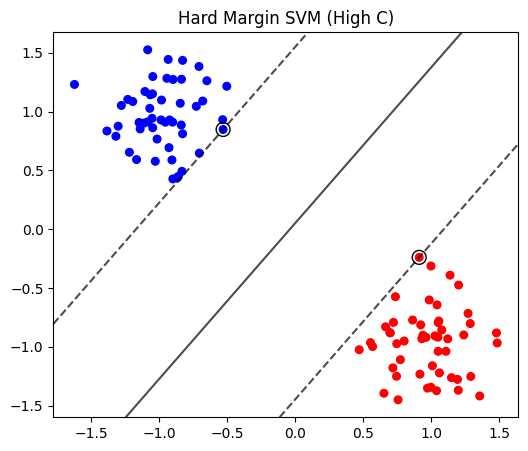

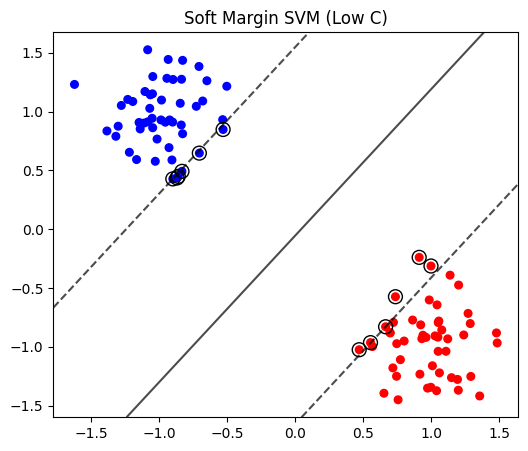

In [ ]:
plot_svm(svm_hard, X_scaled, y, "Hard Margin SVM (High C)")
plot_svm(svm_soft, X_scaled, y, "Soft Margin SVM (Low C)")


In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
svm_linear = SVC(kernel="linear", C=1)
svm_rbf = SVC(kernel="rbf", C=1, gamma=1)
svm_poly = SVC(kernel="poly", degree=3, C=1)

svm_linear.fit(X_scaled, y)
svm_rbf.fit(X_scaled, y)
svm_poly.fit(X_scaled, y)


SVC(C=1, kernel='poly')

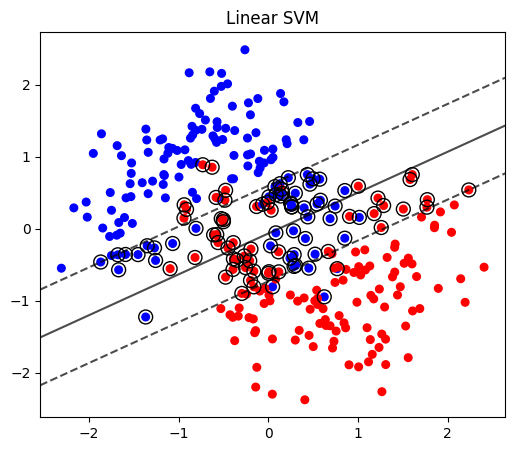

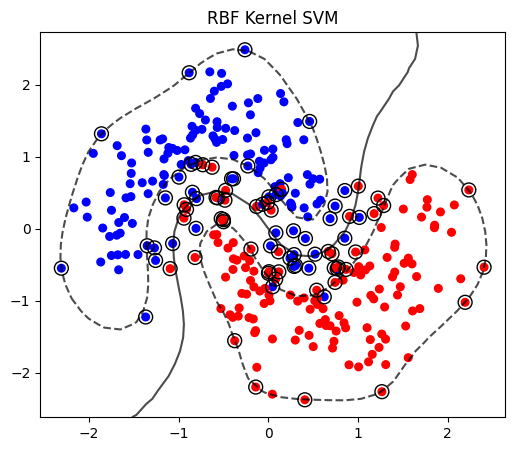

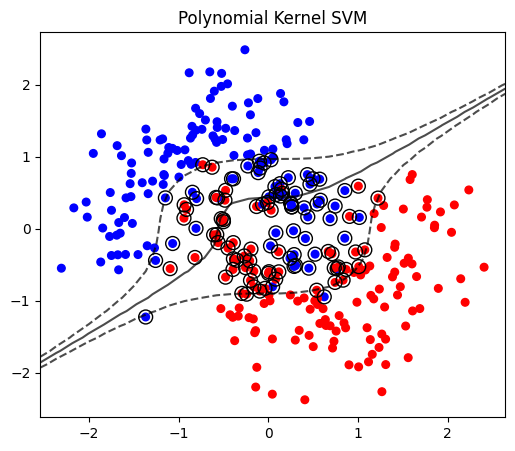

In [ ]:
plot_svm(svm_linear, X_scaled, y, "Linear SVM")
plot_svm(svm_rbf, X_scaled, y, "RBF Kernel SVM")
plot_svm(svm_poly, X_scaled, y, "Polynomial Kernel SVM")


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y += 0.2 * np.random.randn(len(y))


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))


In [ ]:
svr_linear = SVR(kernel="linear", C=1, epsilon=0.1)
svr_rbf = SVR(kernel="rbf", C=10, gamma=0.5, epsilon=0.1)
svr_poly = SVR(kernel="poly", degree=3, C=10, epsilon=0.1)

svr_linear.fit(X_scaled, y)
svr_rbf.fit(X_scaled, y)
svr_poly.fit(X_scaled, y)


SVR(C=10, kernel='poly')

In [ ]:
X_test = np.linspace(0, 5, 300).reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)

y_lin = svr_linear.predict(X_test_scaled)
y_rbf = svr_rbf.predict(X_test_scaled)
y_poly = svr_poly.predict(X_test_scaled)


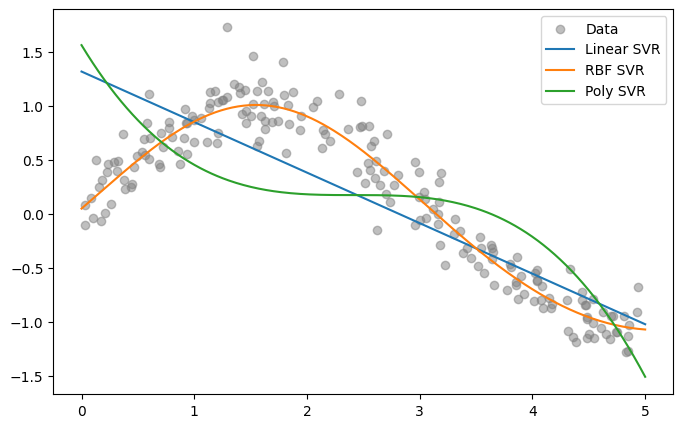

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="gray", alpha=0.5, label="Data")

plt.plot(X_test, y_lin, label="Linear SVR")
plt.plot(X_test, y_rbf, label="RBF SVR")
plt.plot(X_test, y_poly, label="Poly SVR")

plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
np.random.seed(42)

X = np.sort(5 * np.random.rand(300, 1), axis=0)
y = np.sin(X).ravel()
y += 0.2 * np.random.randn(len(y))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1],
    "epsilon": [0.05, 0.1, 0.2]
}


In [ ]:
grid_svr = GridSearchCV(
    SVR(kernel="rbf"),
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_svr.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.05, 0.1, 0.2],
                         'gamma': [0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameters:", grid_svr.best_params_)

best_cv_mse = -grid_svr.best_score_
print("Best CV MSE:", best_cv_mse)


Best Parameters: {'C': 100, 'epsilon': 0.05, 'gamma': 0.1}
Best CV MSE: 0.04393888039708295


In [ ]:
best_svr = grid_svr.best_estimator_

y_pred = best_svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test MSE :", mse)
print("Test RMSE:", rmse)
print("Test R²  :", r2)


Test MSE : 0.03104247513352453
Test RMSE: 0.17618874860082448
Test R²  : 0.9440240679959333


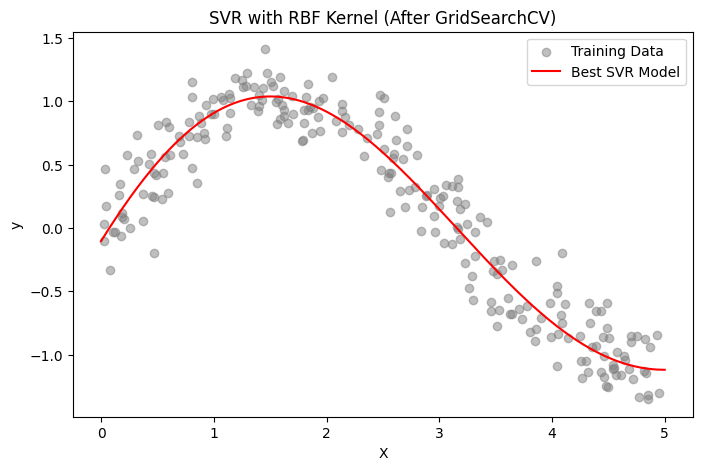

In [ ]:
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)

y_plot = best_svr.predict(X_plot_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="gray", alpha=0.5, label="Training Data")
plt.plot(X_plot, y_plot, color="red", label="Best SVR Model")
plt.xlabel("X")
plt.ylabel("y")
plt.title("SVR with RBF Kernel (After GridSearchCV)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
np.random.seed(42)

X = np.sort(5 * np.random.rand(300, 1), axis=0)
y = np.sin(X).ravel()
y += 0.2 * np.random.randn(len(y))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
svr_final = SVR(
    kernel="rbf",
    C=100,
    gamma=0.1,
    epsilon=0.05
)


In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    svr_final,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)


In [ ]:
train_mse = -train_scores.mean(axis=1)
val_mse = -val_scores.mean(axis=1)


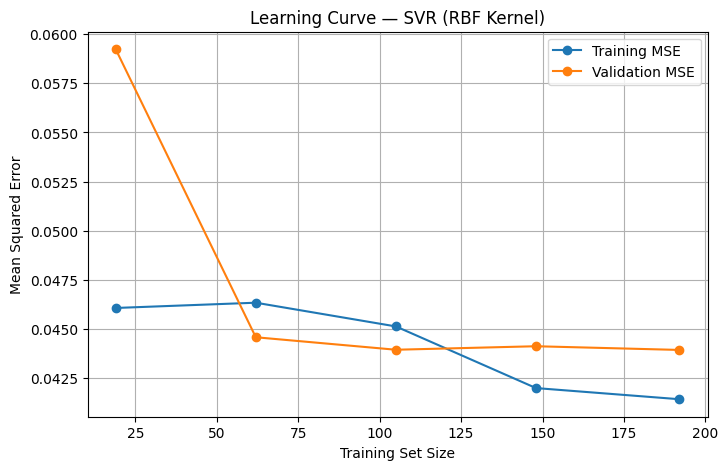

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(train_sizes, train_mse, marker="o", label="Training MSE")
plt.plot(train_sizes, val_mse, marker="o", label="Validation MSE")

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve — SVR (RBF Kernel)")
plt.legend()
plt.grid(True)
plt.show()
